In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image.shape

(28, 28)

In [9]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

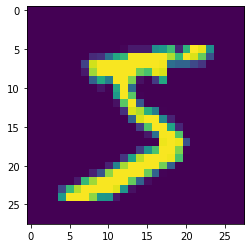

In [10]:
plt.imshow(single_image)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example.shape

(60000, 10)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [18]:
y_cat_train = to_categorical(y_train, 10)

In [19]:
single_image.max()

255

In [21]:
single_image.min()

0

In [22]:
x_train = x_train/255
x_test = x_test/255

In [23]:
scaled_image = x_train[0]

In [24]:
scaled_image.max()

1.0

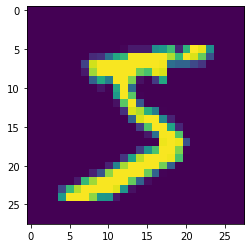

In [25]:
plt.imshow(scaled_image)

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
# batch_size, witdth, height, color_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
# output layer softmax->multi class
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [34]:
model.fit(x_train,y_cat_train,epochs=10, validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1489 - accuracy: 0.9557 - val_loss: 0.0700 - val_accuracy: 0.9769
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.0426 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0470 - val_accuracy: 0.9837


In [35]:
metrics = pd.DataFrame(model.history.history)

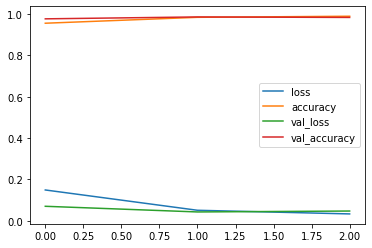

In [36]:
metrics.plot()

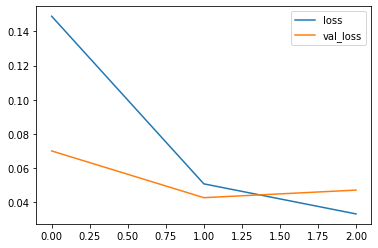

In [37]:
metrics[['loss','val_loss']].plot()

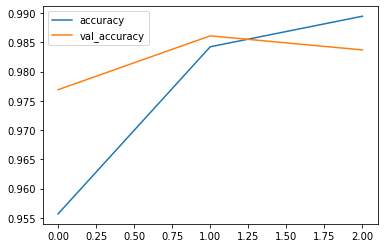

In [38]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.047038935124874115, 0.9836999773979187]

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
y_cat_test.shape

(10000, 10)

In [44]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.97      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.96      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [46]:
confusion_matrix(y_test, predictions)

array([[ 973,    0,    0,    0,    0,    1,    3,    1,    1,    1],
       [   0, 1127,    0,    2,    0,    0,    4,    1,    1,    0],
       [   6,    3,  999,    3,    0,    0,    2,   11,    8,    0],
       [   0,    0,    0, 1005,    0,    0,    0,    2,    3,    0],
       [   0,    1,    0,    0,  970,    0,    5,    3,    0,    3],
       [   1,    0,    0,   17,    0,  866,    3,    1,    3,    1],
       [   3,    1,    0,    0,    2,    2,  950,    0,    0,    0],
       [   0,    0,    2,    2,    0,    0,    0, 1022,    1,    1],
       [   4,    1,    1,    1,    0,    0,    2,    6,  958,    1],
       [   2,    1,    0,    6,   13,    2,    0,   15,    3,  967]])

In [47]:
import seaborn as sns

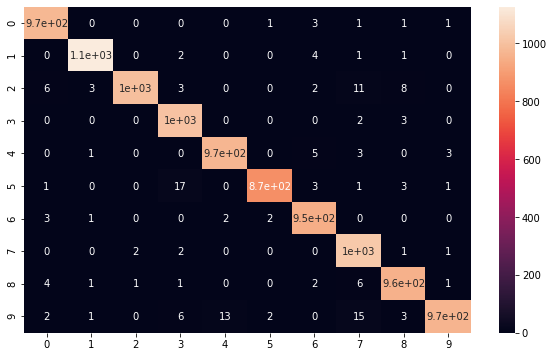

In [50]:
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot =True)

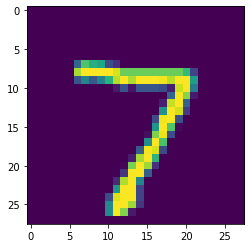

In [52]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

In [53]:
# num_imafes, width, heoght, color_channels

model.predict_classes(my_number.reshape(1,28,28,1))


array([7])